In [4]:
!pip install nltk

  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.60.0-py2.py3-none-any.whl (75 kB)


In [5]:
import nltk
nltk.download(["names",'shakespeare',"stopwords","state_union","twitter_samples","movie_reviews","averaged_perceptron_tagger","vader_lexicon","punkt",])

[nltk_data] Downloading package names to /Users/soham/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package shakespeare to
[nltk_data]     /Users/soham/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.
[nltk_data] Downloading package stopwords to /Users/soham/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/soham/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/soham/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/soham/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/soham/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_le

True

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [8]:
sia.polarity_scores("I have visited  the hotel many times. I suggest you come and enjoy at the hotel . The hotel is located near bts and mrt. You can come here and travel anywhere easily. The staff Chat and Liya have excellent service mind.")

{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.8519}

In [11]:
score = sia.polarity_scores("I feel disappointed with staff, Service mind in hotel industry is the most important but i didn’t see any service mind from here, especially in Vanilla sky bar and Reservation staff! I can feel unprofessional :(")

In [62]:
score['compound']

-0.8778

In [33]:
f = open("Hotel Reviews DB/Bangkok/Bangkok_Hotels_Master.csv", "r")

In [34]:
urls = f.readlines()

In [37]:
f.close()

In [55]:
f1 = open("Hotel Reviews DB/Bangkok/Reviews/Bangkok_reviews_1.csv", "r")
f2 = open("Hotel Reviews DB/Bangkok/Ratings/Bangkok_ratings_1.csv", "r")
reviews = f1.readlines()
for i in range(0, len(reviews)):
    reviews[i] = reviews[i].rstrip("\n")
ratings = f2.readlines()
for i in range(0,len(ratings)):
    ratings[i] = float(ratings[i].rstrip("\n"))
f1.close()
f2.close()

In [57]:
reviews

['I have visited  the hotel many times. I suggest you come and enjoy at the hotel . The hotel is located near bts and mrt. You can come here and travel anywhere easily. The staff Chat and Liya have excellent service mind.',
 '"Checkin by Benz , Queen , Tarn form the front at the hotel they are so kind and best performance so many people who come to checkout but they can manange and handle it well recommend to come and visit here"',
 '"Good service, no glitches, near the subway station  Next to a shopping mall  And travel easily  If you do not know where to stay in Bangkok  Think about it here Quarter!   Good service without glitches. By Benz Tarn Queen"',
 '"For a long time i had to stay at The Quarter Ladprao for once, This place have good room (luxury room in Mid-range budget) and great service. i come to frontdesk before check in arrive about 8 hr but officer (Mr.Khaw) had to help me to check in Before ETA (Promotion) that vary vary good for me thank."',
 '"I selected The Quarter La

In [68]:
import re
pattern = "Reviews-(.*?)-Bangkok.html#"
hotels = []
for url in urls:
    hotels.append(re.search(pattern, url).group(1))

print(len(hotels))


20


In [73]:
polscores = []
for review in reviews:
    polscores.append(sia.polarity_scores(review)['compound'])

In [74]:
print(len(polscores))
print(len(ratings))

100
100


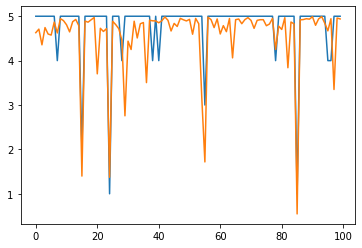

In [85]:
from matplotlib import pyplot as plt
plt.plot(ratings)
plt.plot([2.5*(i+1) for i in polscores])
plt.show()